# *Iris Flower Classification*

#### The objective of this project is to develop a model that can accurately classify IRIS flowers into specific categories based on their measurements

#### **Importing Modules**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Importing csv file**

In [218]:
data = pd.read_csv("C:/Users/User/Downloads/IRIS.csv")

#### **Previewing data**

In [219]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [220]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [221]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [222]:
data.shape

(150, 5)

In [223]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [224]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [225]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [226]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [227]:
data.drop(['species'], axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## **Visualization**

### Histogram

<Axes: >

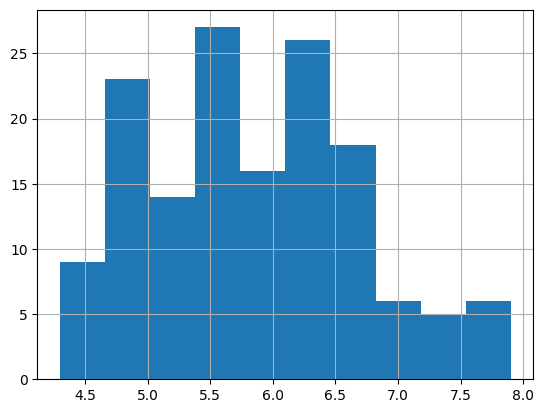

In [228]:
data['sepal_length'].hist()

<Axes: >

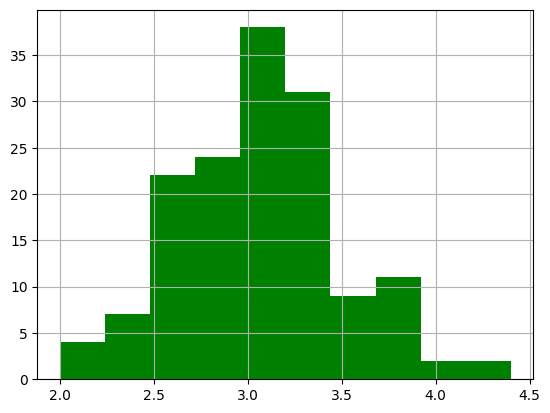

In [229]:
data['sepal_width'].hist(color='green')

<Axes: >

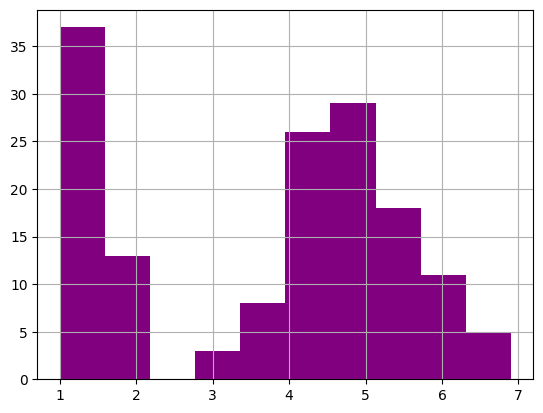

In [230]:
data['petal_length'].hist(color='purple')

<Axes: >

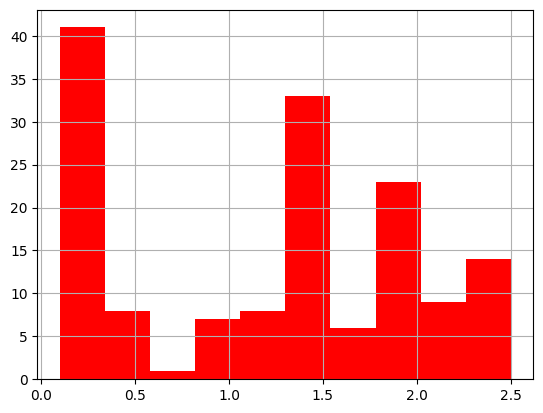

In [231]:
data['petal_width'].hist(color='red')

### ScatterPlot

In [232]:
colors =['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

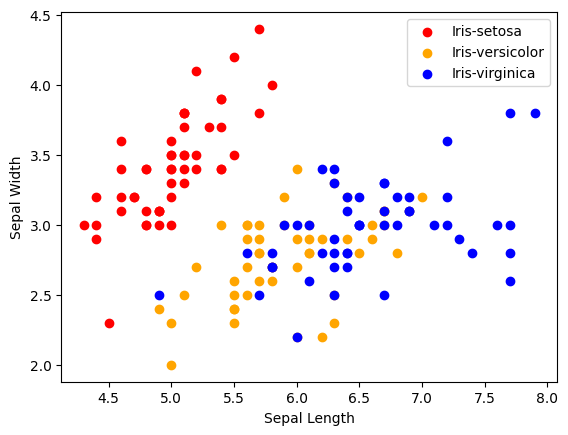

In [233]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

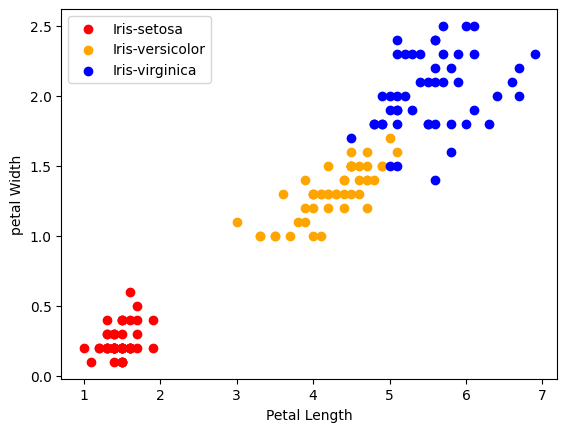

In [234]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('petal Width')
plt.legend()

### Correlation Heatmap

<Axes: >

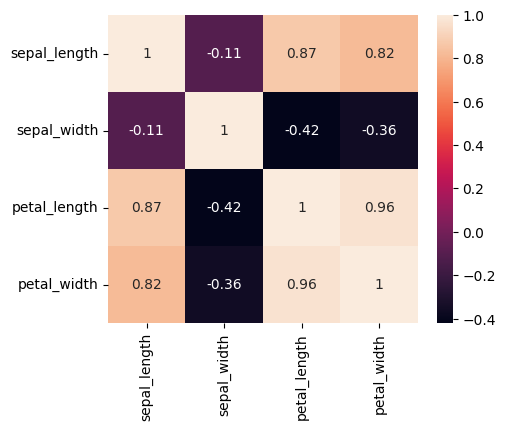

In [235]:
corr = data.drop(['species'], axis=1).corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax)

### 3D Scatter plot

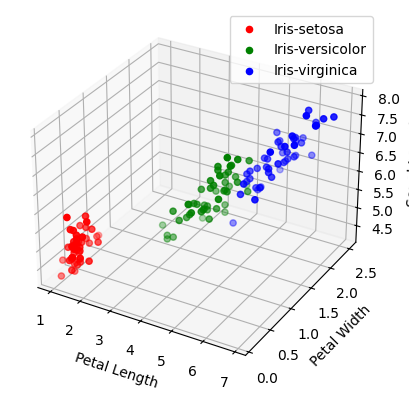

In [236]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}


for species in data['species'].unique():
    species_data = data[data['species'] == species]
    ax.scatter(species_data['petal_length'], species_data['petal_width'], species_data['sepal_length'], 
               c=colors[species], label=species)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
ax.legend()

plt.show()

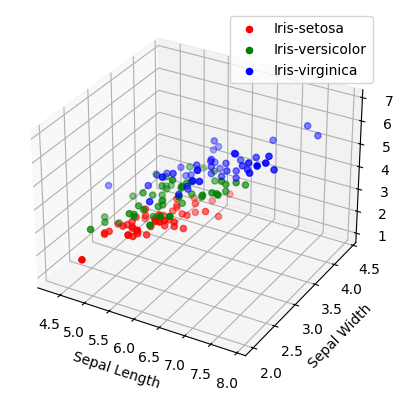

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the colors for each species
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

# Create a 3D scatter plot
for species in data['species'].unique():
    species_data = data[data['species'] == species]
    ax.scatter(species_data['sepal_length'], species_data['sepal_width'], species_data['petal_length'],
               c=colors[species], label=species)

# Set labels for the axes
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()

# Show the plot
plt.show()

### **Model**

#### Importing modules

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#### Converting the species classes column to numerical values

In [239]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Dropping the species column and assigning to X

In [240]:
X = data.drop(['species'], axis=1)

#### Extracting Target Variable

In [241]:
Y = data['species']

#### Spliting Data into training and testing set

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### **Logistic Regression**

#### Importing Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression

#### Initializing Logistic Regression

In [244]:
model = LogisticRegression()

#### Training the model

In [245]:
model.fit(X_train, y_train)

LogisticRegression()

#### Predicting the test set

In [246]:
pred = model.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#### Accuracy

In [247]:
accuracy = accuracy_score(y_test, pred)
accuracy

1.0

### **Random Forest Classifier**

#### Importing Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier

#### Initializing Random Forest Classifier

In [249]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

#### Training the model

In [250]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Predicting the test set

In [251]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#### Accuracy

In [252]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

### **KNN Classifier**

#### Importing K-Neighbors

In [253]:
from sklearn.neighbors import KNeighborsClassifier

#### Initializing K-Neighbors

In [254]:
model = KNeighborsClassifier()

#### Training the model

In [255]:
model.fit(X_train, y_train)

KNeighborsClassifier()

#### Predicting the test set

In [256]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#### Accuracy

In [257]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

#### This project successfully developed a predictive model with an impressive accuracy of 100% in classifying Iris flower into different categories based on their measurements. 